# Evaluation Project - 4

### Global Power Plant 

In [7]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importing dataset
df=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [9]:
#reading the dataset
df.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The target variables are  capacity_mw and primary fuel whic we need to predict

In [10]:
#Getting the shapae of the dataset
df.shape

(908, 25)

We have 908 rows and 908 columns in our dataset 

In [11]:
# Reading the column names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [13]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [14]:
#dropping unwanted columns
df.drop("other_fuel3",axis=1,inplace=True)
df.drop("wepp_id",axis=1,inplace=True)
df.drop("estimated_generation_gwh",axis=1,inplace=True)

In [15]:
#Since there are more number of null values checking the values for unique count for remaining field
df.nunique()

country                     1
country_long                1
name                      908
gppd_idnr                 908
capacity_mw               365
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
other_fuel2                 1
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2013       364
generation_gwh_2014       374
generation_gwh_2015       398
generation_gwh_2016       405
generation_gwh_2017       410
generation_data_source      1
dtype: int64

In [16]:
# Dropping the columns which contains unique values
df.drop("country",axis=1,inplace=True)
df.drop("country_long",axis=1,inplace=True)
df.drop("year_of_capacity_data",axis=1,inplace=True)

In [17]:
df.drop("other_fuel2",axis=1,inplace=True)

In [18]:
# Checking for the skewness in the dataset
df.skew()

capacity_mw            3.193257
latitude              -0.143622
longitude              1.100942
commissioning_year    -1.056132
generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
dtype: float64

In [19]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

# EDA

In [20]:
#value counts for the remaining object type fields to check the relevance
df['name'].value_counts()

WADI CEMENT PLANT                1
Lakhmirwala Solar Power Plant    1
KADRA                            1
Mokal Wind Farm                  1
METTUR                           1
                                ..
UKAI LBC                         1
BELA NAGPUR                      1
MUL GRETA                        1
BIRSINGHPUR                      1
Mokla Wind farm                  1
Name: name, Length: 908, dtype: int64

In [21]:
df['gppd_idnr'].value_counts()

IND0000360    1
IND0000019    1
IND0000174    1
IND0000205    1
WRI1026763    1
             ..
IND0000344    1
WRI1026097    1
IND0000040    1
IND0000093    1
WRI1026107    1
Name: gppd_idnr, Length: 908, dtype: int64

In [22]:
df['owner'].value_counts()

Jk Cement ltd                            4
Sterling Agro Industries ltd.            4
Acc Acc ltd                              4
Government of India                      3
Enercon India Ltd.                       3
                                        ..
Khaya Solar Projects Private Limited     1
Rucha Soya Industries Limited            1
Kohinoor Planet Construction Pvt. Ltd    1
Sri Sugars ltd                           1
Mukesh Gupta group                       1
Name: owner, Length: 280, dtype: int64

In [23]:
df['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Sunflag Co ltd                                 1
Est vt Arind                                   1
Sterling and Wilson                            1
Power Private edM/Pdf                          1
National And paper                             1
Name: source, Length: 191, dtype: int64

In [24]:
df['url'].value_counts()

http://www.cea.nic.in/                                                              520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.azurepower.com                                                             4
                                                                                   ... 
http://www.uttamgalva.com/                                                            1
http://rswm.in/                                                                       1
http://wbpdcl.co.in                                                                   1
https://cdm.unfccc.int/Projects/DB/RWTUV1297334588.3/view                             1
http://www.topworthgroup.com/                                                         1
Name: url, Length: 304, dtype: i

In [25]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [26]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [27]:
df.drop("name",axis=1,inplace=True)
df.drop("gppd_idnr",axis=1,inplace=True)
df.drop("url",axis=1,inplace=True)
df.drop("owner",axis=1,inplace=True)

In [28]:
df.drop("generation_data_source",axis=1,inplace=True)

In [29]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

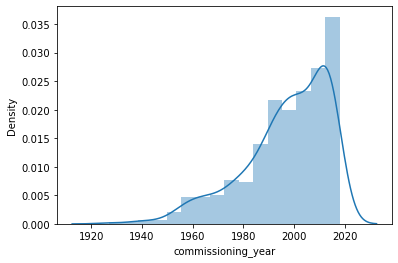

In [30]:
sns.distplot(df['commissioning_year'])

In [31]:
df['commissioning_year'].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [32]:
#We can extract the age of the power plant using the commissioning year column
df['PP_age'] = 2022 - df['commissioning_year']

In [33]:
df.head(5)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,PP_age
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,11.0
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500,18.0
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,7.0


In [34]:
#We can drop 'commissioning_year' column now 
df.drop("commissioning_year",axis=1,inplace=True)

In [35]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'PP_age'],
      dtype='object')

In [36]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
PP_age                 380
dtype: int64

## Handling NA Value
#We see lot of null values in the dataset.Let sfill the null values with the mean/median method.

In [37]:
#Lets check for the skewness and data distribution before filling up the null values

<AxesSubplot:xlabel='latitude', ylabel='Density'>

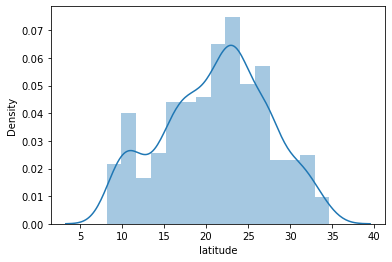

In [38]:
#Checking distribution of latitude
sns.distplot(df['latitude'])

In [39]:
#The data looks normally distributed.The null values can be filled with mean values
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

<AxesSubplot:xlabel='longitude', ylabel='Density'>

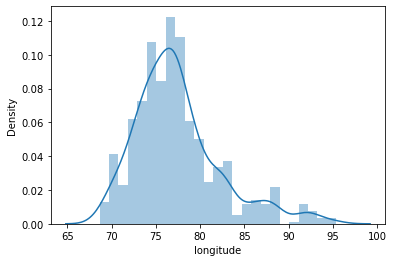

In [40]:
# Checking distribution of longitude
sns.distplot(df['longitude'])

In [41]:
#The data is left skewed.Filling Na values using median method
df['longitude']=df['longitude'].fillna(df['longitude'].median())

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

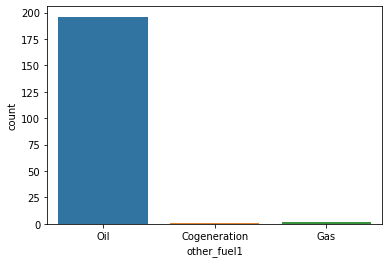

In [42]:
#checking frequency for the fuel coumn

sns.countplot(df['other_fuel1'])

In [43]:
#Filling na values using mode 
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

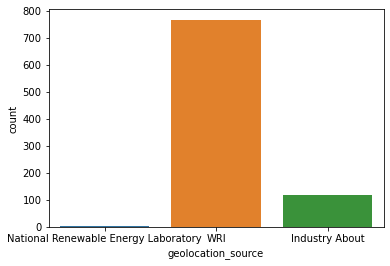

In [44]:
#checking frequency for the fuel coumn

sns.countplot(df['geolocation_source'])

In [45]:
#filling na values with mode
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

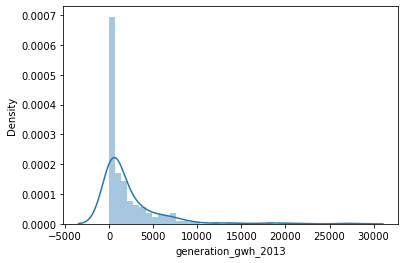

In [46]:
#Checking distribution of generation_gwh
sns.distplot(df['generation_gwh_2013'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

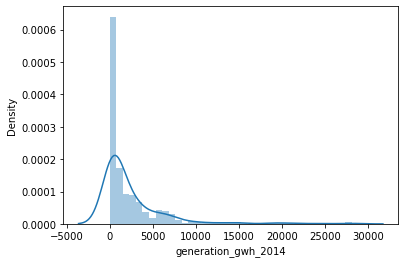

In [47]:
sns.distplot(df['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

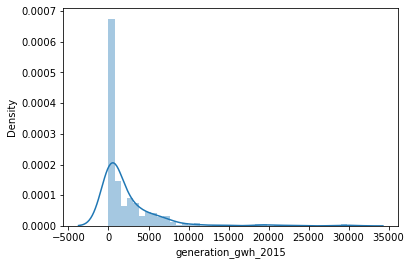

In [48]:
sns.distplot(df['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

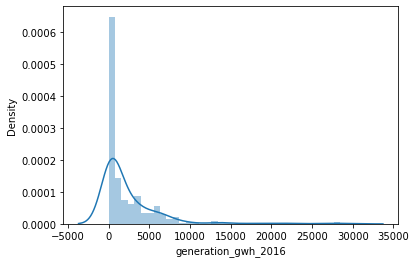

In [49]:
sns.distplot(df['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

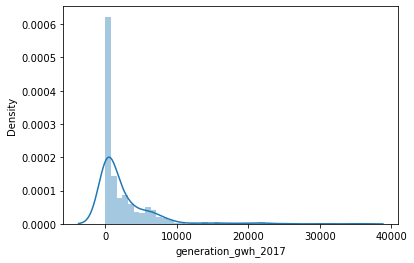

In [50]:
sns.distplot(df['generation_gwh_2017'])

In [51]:
# As there is a skewness in the data distribution for generation_gwh.Filling na values using median
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())

In [52]:
 df['PP_age']=df['PP_age'].fillna(df['PP_age'].median())

In [53]:
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())

In [54]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
PP_age                 0
dtype: int64

<AxesSubplot:>

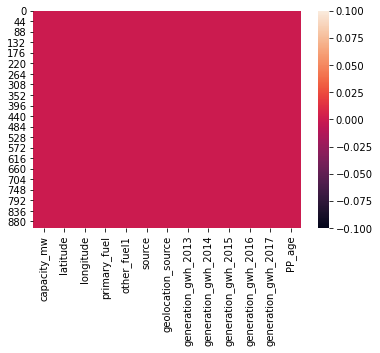

In [55]:
sns.heatmap(df.isnull())

In [56]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,PP_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.02725,716.728350,807.601700,11.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,22.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,22.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.74700,886.004428,663.774500,18.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,7.0


In [57]:
#Lets check the statistics of the dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,PP_age
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,23.816079
std,580.221767,6.088110,4.783873,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,13.085938
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,16.837500,17.057825,74.390250,797.063475,805.760000,701.027250,716.728350,807.601700,19.000000
50%,60.000000,21.278850,76.719250,797.063475,805.760000,701.027250,716.728350,807.601700,22.000000
75%,388.125000,25.183775,79.211600,797.063475,805.760000,701.027250,716.728350,807.601700,25.000000
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,95.000000


# Skewness

In [58]:
#Separating numerical & categorical columns from the dataset
categorical_col1=df[['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']]
categorical_col1

,primary_fuel,other_fuel1,source,geolocation_source
0,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,Coal,Oil,Ultratech Cement ltd,WRI
2,Wind,Oil,CDM,WRI
3,Gas,Oil,Central Electricity Authority,WRI
4,Coal,Oil,Central Electricity Authority,WRI
...,...,...,...,...
903,Coal,Oil,Central Electricity Authority,WRI
904,Solar,Oil,Karnataka Power Corporation Limited,Industry About
905,Wind,Oil,CDM,WRI
906,Coal,Oil,Hindustan Zinc ltd,WRI


In [59]:
# Checking for numerical columns
numerical_col1=df[['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'PP_age']]

In [60]:
numerical_col1

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,PP_age
0,2.5,28.1839,73.2407,797.063475,805.760000,701.027250,716.728350,807.601700,11.0
1,98.0,24.7663,74.6090,797.063475,805.760000,701.027250,716.728350,807.601700,22.0
2,39.2,21.9038,69.3732,797.063475,805.760000,701.027250,716.728350,807.601700,22.0
3,135.0,23.8712,91.3602,631.777928,617.789264,843.747000,886.004428,663.774500,18.0
4,1800.0,21.9603,82.4091,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,7.0
...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,797.063475,805.760000,0.994875,233.596650,865.400000,6.0
904,3.0,12.8932,78.1654,797.063475,805.760000,701.027250,716.728350,807.601700,22.0
905,25.5,15.2758,75.5811,797.063475,805.760000,701.027250,716.728350,807.601700,22.0
906,80.0,24.3500,73.7477,797.063475,805.760000,701.027250,716.728350,807.601700,22.0


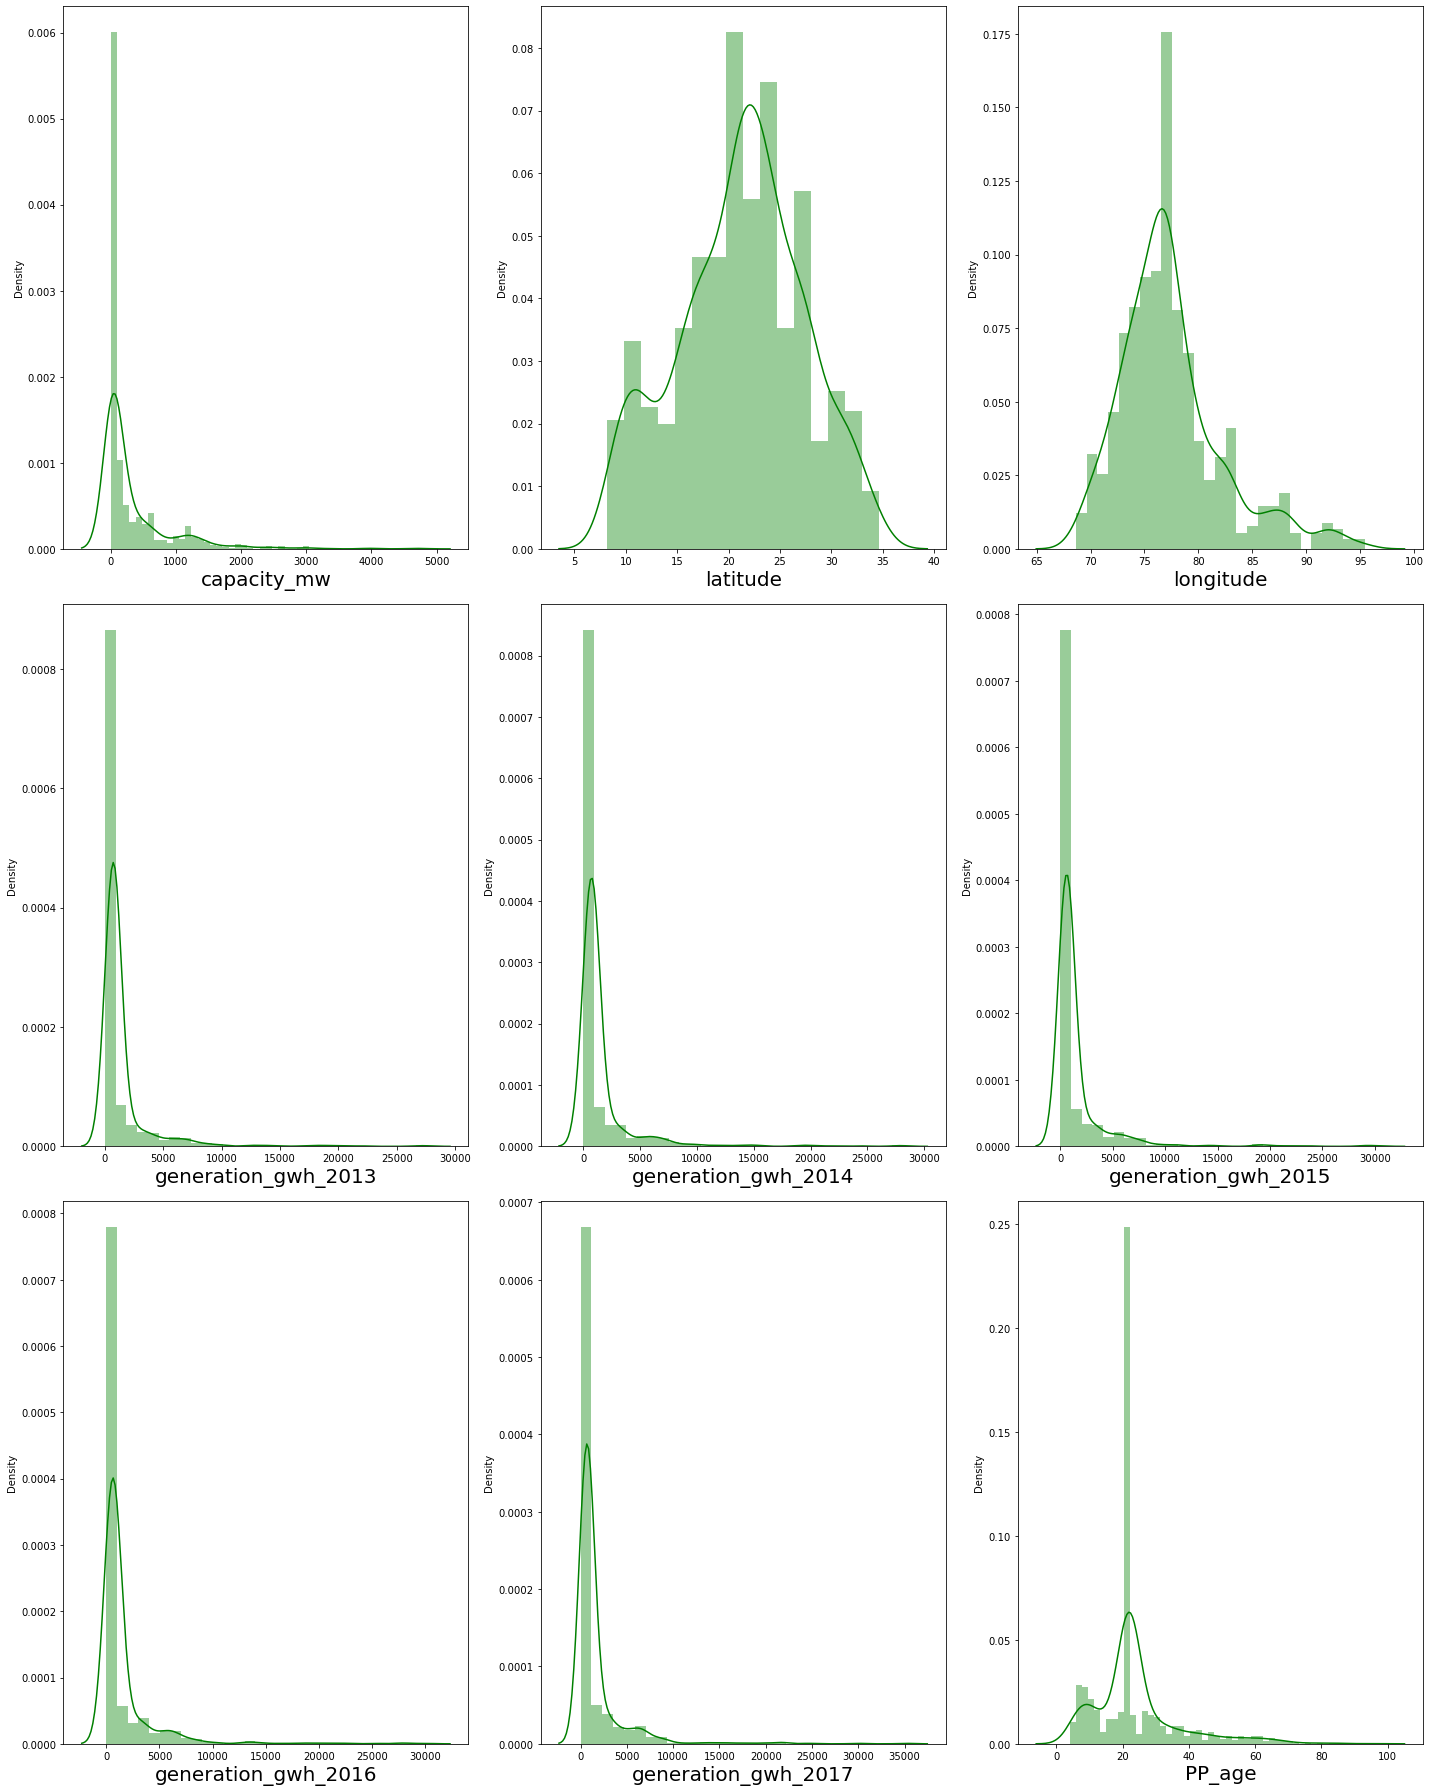

In [61]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in numerical_col1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [62]:
#All the numerical columns have skewness except for latitude


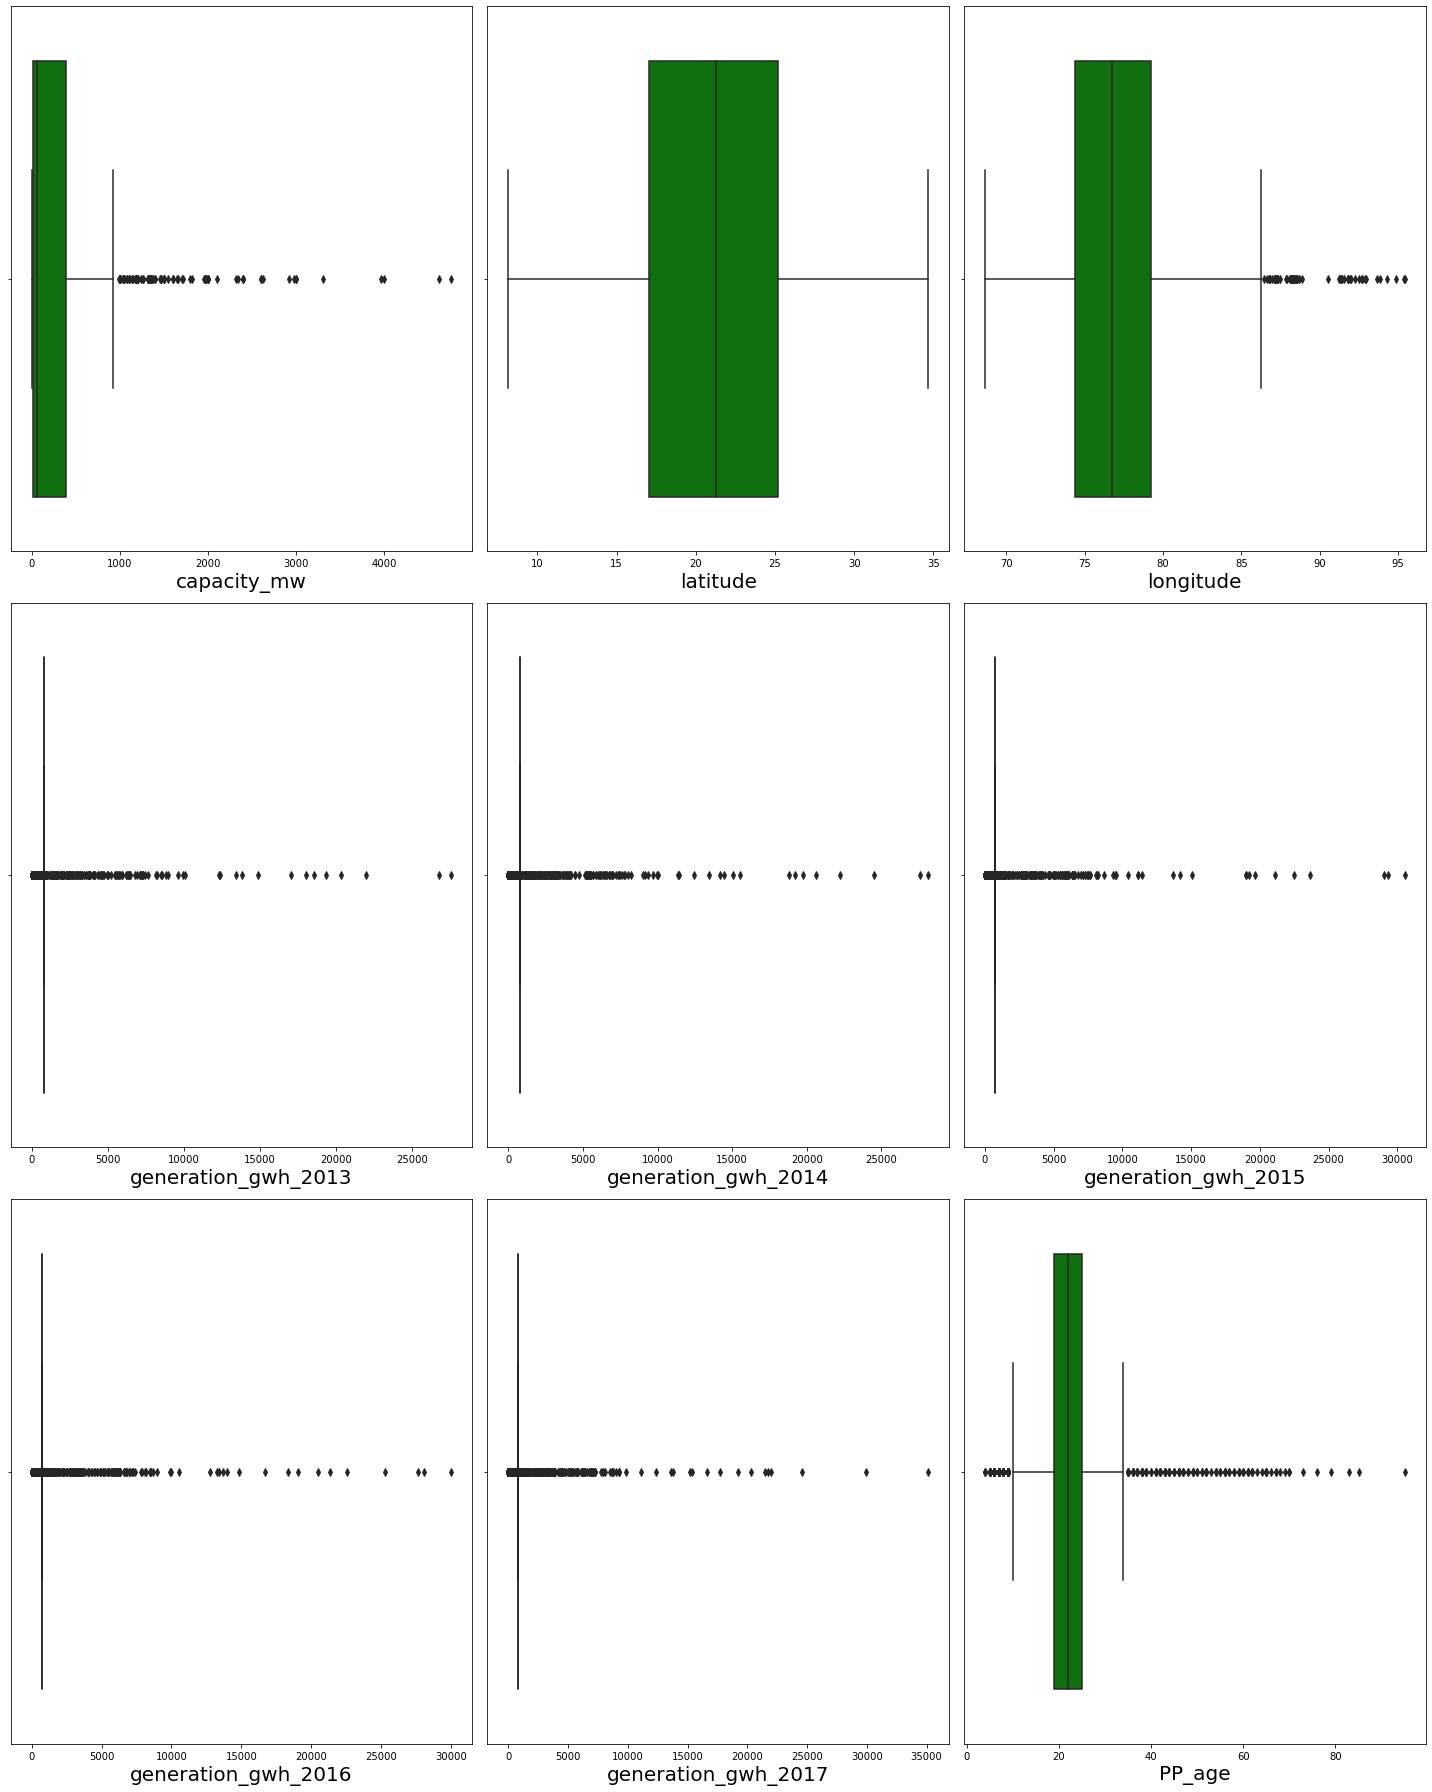

In [63]:
# Checking for outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in numerical_col1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [64]:
#We see many outliers in the dataset

In [65]:
# Features having outliers
features_with_outliers = df[['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','PP_age']]

In [66]:
# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features_with_outliers))
z

array([[0.87220856, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.97991772],
       [0.58602743, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [1.68109953, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       ...,
       [0.38271188, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.76616907, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.01377542, 0.24754473, 0.25632114, ..., 0.27820854, 0.27617103,
        0.13885747]])

In [67]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,PP_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700,11.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,22.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,22.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,18.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,797.063475,805.760000,0.994875,233.596650,865.400000,6.0
904,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700,22.0
905,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,22.0
906,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,22.0


In [68]:
print(df.shape)


(908, 13)


In [69]:
print(new_df.shape)

(852, 13)


In [70]:
# Percentage loss
p_loss =(908-852)/908*100

In [71]:
p_loss

6.167400881057269

the data loss is 6.16 %. Since the data loss is small % we can proceed with the new dataset for further analysis

In [72]:
numerical_col2=new_df[['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'PP_age']]

In [73]:
# Converting categorical variables into numerical variables using Lebel Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [74]:
new_df['primary_fuel']=le.fit_transform(new_df['primary_fuel'])
new_df['other_fuel1']=le.fit_transform(new_df['other_fuel1'])
new_df['source']=le.fit_transform(new_df['source'])
new_df['geolocation_source']=le.fit_transform(new_df['geolocation_source'])

In [75]:
new_df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
other_fuel1              int32
source                   int32
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
PP_age                 float64
dtype: object

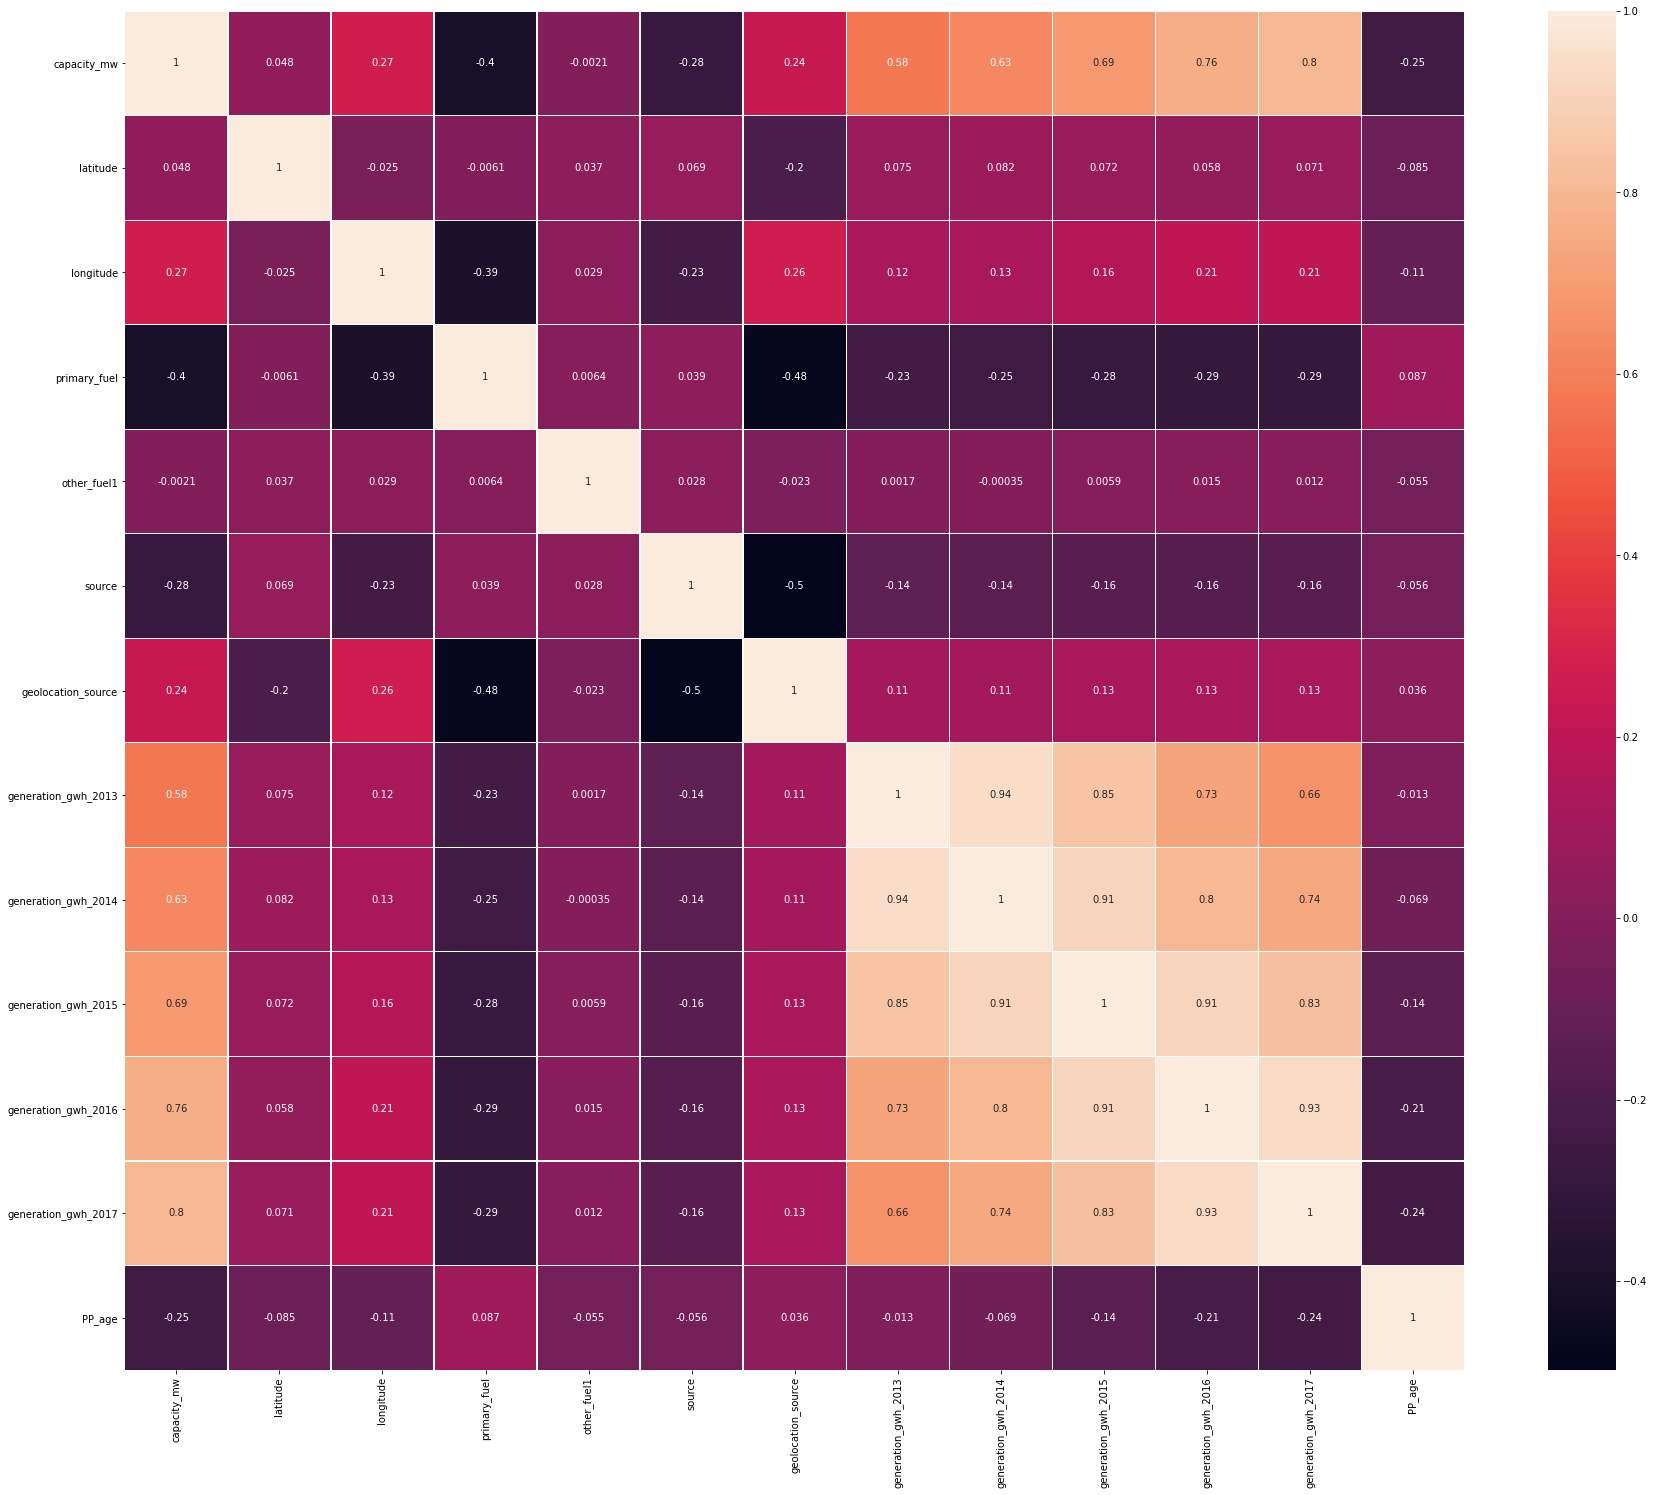

In [76]:
# Checking for the correlation using heatmap

corr = new_df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(new_df.corr(),linewidths=0.1,annot=True)
plt.show()

In [77]:
new_df.drop(columns="latitude",axis=1,inplace=True)
new_df.drop(columns="other_fuel1",axis=1,inplace=True)
new_df

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,PP_age
0,2.5,73.2407,6,109,1,797.063475,805.760000,701.027250,716.728350,807.601700,11.0
1,98.0,74.6090,1,174,2,797.063475,805.760000,701.027250,716.728350,807.601700,22.0
2,39.2,69.3732,7,21,2,797.063475,805.760000,701.027250,716.728350,807.601700,22.0
3,135.0,91.3602,2,22,2,631.777928,617.789264,843.747000,886.004428,663.774500,18.0
4,1800.0,82.4091,1,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,7.0
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,77.3568,1,22,2,797.063475,805.760000,0.994875,233.596650,865.400000,6.0
904,3.0,78.1654,6,77,0,797.063475,805.760000,701.027250,716.728350,807.601700,22.0
905,25.5,75.5811,7,21,2,797.063475,805.760000,701.027250,716.728350,807.601700,22.0
906,80.0,73.7477,1,59,2,797.063475,805.760000,701.027250,716.728350,807.601700,22.0


## Feature selection 


In [78]:
x = new_df.drop("capacity_mw",axis=1)
y = new_df['capacity_mw']

In [79]:
x.skew()

longitude              0.888694
primary_fuel           0.413982
source                 1.736117
geolocation_source    -2.068499
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
PP_age                 1.209638
dtype: float64

In [80]:
#Removing skewness in the dataset using power transform method
#importing power transform from library
from sklearn.preprocessing import power_transform


In [81]:
x=power_transform(x,method="yeo-johnson")
x

array([[-0.92403917,  1.13384938,  1.52913594, ..., -0.05461031,
        -0.03923644, -1.16483835],
       [-0.50062957, -0.99460666,  1.98285743, ..., -0.05461031,
        -0.03923644,  0.0824874 ],
       [-2.37361202,  1.40414507, -0.48783025, ..., -0.05461031,
        -0.03923644,  0.0824874 ],
       ...,
       [-0.22356344,  1.40414507, -0.48783025, ..., -0.05461031,
        -0.03923644,  0.0824874 ],
       [-0.7623587 , -0.99460666,  0.8573127 , ..., -0.05461031,
        -0.03923644,  0.0824874 ],
       [ 0.2662326 ,  1.40414507, -0.48783025, ..., -0.05461031,
        -0.03923644,  0.0824874 ]])

In [82]:
# Scaling the data using standard scaler
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [83]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[-0.92403918,  1.13384938,  1.52913594, ..., -0.05461031,
        -0.03923644, -1.16483835],
       [-0.50062958, -0.99460666,  1.98285743, ..., -0.05461031,
        -0.03923644,  0.0824874 ],
       [-2.37361203,  1.40414507, -0.48783025, ..., -0.05461031,
        -0.03923644,  0.0824874 ],
       ...,
       [-0.22356345,  1.40414507, -0.48783025, ..., -0.05461031,
        -0.03923644,  0.0824874 ],
       [-0.76235871, -0.99460666,  0.8573127 , ..., -0.05461031,
        -0.03923644,  0.0824874 ],
       [ 0.2662326 ,  1.40414507, -0.48783025, ..., -0.05461031,
        -0.03923644,  0.0824874 ]])

## ML Model Building

In [86]:
#importing ml libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [87]:
# finding the best random state number
best_rstate=0
accu=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    predmod=mod.predict(x_test)
    tempaccu=r2_score(y_test,predmod)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
print(f" best accuracy={accu*100} found on random_state{best_rstate}")
print("mean squared error:",mean_squared_error(y_test,predmod))
print("mean absolute error:",mean_absolute_error(y_test,predmod))

 best accuracy=65.72253650623739 found on random_state309
mean squared error: 93495.4703467737
mean absolute error: 219.4994619206319


In [89]:
# Training the dataset
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)

## Finding the best model

In [91]:
#Lets import the libraries for model fitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [92]:
#Finding the best model
sv=SVR(kernel='linear')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
ls=Lasso()
rd=Ridge()
lr=LinearRegression()
model=[lr,sv,dt,rf,kn,ab,ls,rd]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean())
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,0.529202,0.547449,93495.470347,0.512050
1,SupportVector,0.363355,0.419354,119959.443775,0.383040
2,DecisionTree,0.999879,0.526066,97913.165198,0.660581
3,RandomForest,0.965713,0.770375,47439.658826,0.783632
4,KNN,0.830142,0.782354,44964.923145,0.743201
5,AdaBoost,0.726349,0.631707,76088.041906,0.570317
6,Lasso,0.528927,0.553563,92232.360946,0.515754
7,Ridge,0.529195,0.548446,93289.364647,0.512405


In [93]:
# Random Forest is best that fits the model as it has the minimumm difference between the accuracy & cv score

In [94]:
# Saving the model

#saving the file
import pickle
filename="Global_power_plant_capacity.pkl"
pickle.dump(rf,open(filename,"wb"))

## 2. Making predictions for Primary fuel 

In [95]:
x1 = new_df.drop("primary_fuel",axis=1)
y1 = new_df['primary_fuel']

In [96]:
#Removing skewness in the dataset using power transform method
#importing power transform from library
from sklearn.preprocessing import power_transform

In [97]:
x1=power_transform(x,method="yeo-johnson")
x1

array([[-0.92404426,  1.13802329,  1.4795819 , ..., -0.02949144,
        -0.01777932, -1.16082484],
       [-0.50072981, -0.99434355,  1.8863854 , ..., -0.02949144,
        -0.01777932,  0.07466451],
       [-2.37303252,  1.41559811, -0.46356142, ..., -0.02949144,
        -0.01777932,  0.07466451],
       ...,
       [-0.22369948,  1.41559811, -0.46356142, ..., -0.02949144,
        -0.01777932,  0.07466451],
       [-0.76240526, -0.99434355,  0.86201344, ..., -0.02949144,
        -0.01777932,  0.07466451],
       [ 0.26610031,  1.41559811, -0.46356142, ..., -0.02949144,
        -0.01777932,  0.07466451]])

In [98]:
# Scaling the data using standard scaler
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [99]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x1)
x_scaled

array([[-0.92404426,  1.13802329,  1.4795819 , ..., -0.02949144,
        -0.01777932, -1.16082484],
       [-0.50072981, -0.99434355,  1.8863854 , ..., -0.02949144,
        -0.01777932,  0.07466451],
       [-2.37303252,  1.41559811, -0.46356142, ..., -0.02949144,
        -0.01777932,  0.07466451],
       ...,
       [-0.22369948,  1.41559811, -0.46356142, ..., -0.02949144,
        -0.01777932,  0.07466451],
       [-0.76240526, -0.99434355,  0.86201344, ..., -0.02949144,
        -0.01777932,  0.07466451],
       [ 0.26610031,  1.41559811, -0.46356142, ..., -0.02949144,
        -0.01777932,  0.07466451]])

## ML Model Building

In [100]:
#Training the model
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y1,test_size=.25,random_state=56)

In [101]:
# finding the best model
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc=dtc.predict(x_test)
cvscore=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=5).mean()
print(accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))
print("cross val score=",(cvscore*100))

0.9906103286384976
[[17  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0]
 [ 0  0  0 59  0  0  0  0]
 [ 0  0  0  0  3  2  0  0]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        59
           4       1.00      0.60      0.75         5
           5       0.67      1.00      0.80         4
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        30

    accuracy                           0.99       213
   macro avg       0.96      0.95      0.94       213
weighted avg       0.99      0.99      0.99       213

cross val score= 100.0


In [102]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
cvscore=cross_val_score(SVC(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predsvc))
print("confusion matrix=",confusion_matrix(y_test,predsvc))
print("classification report=",classification_report(y_test,predsvc))
print("cross val score=",(cvscore*100))

accuracy score= 0.9014084507042254
confusion matrix= [[17  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0]
 [ 0  4  8  6  0  0  0  0]
 [ 0  2  0 57  0  0  0  0]
 [ 0  0  1  3  0  1  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 30]]
classification report=               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.88      1.00      0.94        45
           2       0.89      0.44      0.59        18
           3       0.81      0.97      0.88        59
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        30

    accuracy                           0.90       213
   macro avg       0.70      0.68      0.68       213
weighted avg       0.87      0.90      0.88       213

cross val score= 91.08390748031496


In [105]:
#KNN
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
cvscore=cross_val_score(KNN(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predknn))
print("confusion matrix=",confusion_matrix(y_test,predknn))
print("classification report=",classification_report(y_test,predknn))
print("cross val score=",(cvscore*100))

accuracy score= 0.8450704225352113
confusion matrix= [[17  0  0  0  0  0  0  0]
 [ 0 42  2  1  0  0  0  0]
 [ 0  5  5  7  0  1  0  0]
 [ 0  8  0 51  0  0  0  0]
 [ 0  2  3  0  0  0  0  0]
 [ 0  0  2  2  0  0  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 30]]
classification report=               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.74      0.93      0.82        45
           2       0.42      0.28      0.33        18
           3       0.84      0.86      0.85        59
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        30

    accuracy                           0.85       213
   macro avg       0.62      0.63      0.63       213
weighted avg       0.81      0.85      0.82       213

cross val score= 87.32529527559055


In [ ]:
GB = GradientBoostingClassifier()


In [106]:
#GB
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
cvscore=cross_val_score(GradientBoostingClassifier(),x_train,y_train,cv=5).mean()
print("accuracy score=",accuracy_score(y_test,predgb))
print("confusion matrix=",confusion_matrix(y_test,predgb))
print("classification report=",classification_report(y_test,predgb))
print("cross val score=",(cvscore*100))

accuracy score= 0.9859154929577465
confusion matrix= [[17  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0]
 [ 0  0  0 59  0  0  0  0]
 [ 0  0  0  0  2  3  0  0]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 30]]
classification report=               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        59
           4       1.00      0.40      0.57         5
           5       0.57      1.00      0.73         4
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        30

    accuracy                           0.99       213
   macro avg       0.95      0.93      0.91       213
weighted avg       0.99      0.99      0.98       213

cross val score= 100.0


In [107]:
#DecisionTreeClassifier gives the best accury score & cross validation score 

In [108]:
# Saving the model

#saving the file
import pickle
filename="Global_power_plant_primary_fuel.pkl"
pickle.dump(dtc,open(filename,"wb"))